In [1]:
import os
import glob
import json
import face_recognition
import tqdm

import numpy as np
import pandas as pd

from PIL import Image

from tqdm import tqdm_notebook
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Face_recognition example

In [2]:
!ls 'dataset/men/Ben Foster'

Image_10.jpg  Image_13.jpg  Image_1.jpg  Image_4.jpg  Image_7.jpg
Image_11.jpg  Image_14.jpg  Image_2.jpg  Image_5.jpg  Image_8.jpg
Image_12.jpg  Image_15.jpg  Image_3.jpg  Image_6.jpg  Image_9.jpg


In [3]:
# load the image with face_recognition
image = face_recognition.load_image_file("./dataset/men/Ben Foster/Image_1.jpg")

# get the coordinates of the location of the face
# return (top, right, bottom, left)
face_locations = face_recognition.face_locations(image)

In [4]:
# origin of coordinates
xy = (face_locations[0][3], face_locations[0][0])

# we get the width and height
width = face_locations[0][1] - face_locations[0][3]
height = face_locations[0][2] - face_locations[0][0]

In [5]:
face_locations

[(167, 340, 390, 117)]

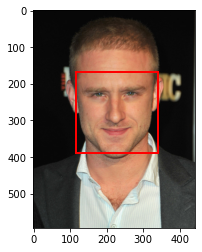

In [6]:
plt.imshow(image)

# Getting the current link 
ax = plt.gca()

# Adding a rectangle where the face is located
rect = patches.Rectangle(xy, width, height, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect);

# Импорт данных

In [7]:
# Let's create a dictionary with the names of actors and actresses
dict_act = {'women': ['Alicia Vikander', 'Amy Adams', 'Andie MacDowell', 'Angelina Jolie', 'Anne Hathaway', 
                      'Cameron Diaz', 'Carey Mulligan', 'Cate Blanchett', 'Catherine Zeta-Jones', 'Charlize Theron', 
                      'Claire Forlani', 'Demi Moore', 'Drew Barrymore', 'Elizabeth Taylor', 'Emma Stone',
                      'Eva Mendes', 'Frances McDormand', 'Gwyneth Paltrow', 'Halle Berry', 'Hilary Swank',
                      'Jennifer Aniston','Jessica Biel','Jessica Chastain','Jodie Foster', 'Julia Roberts',
                      'Julianne Moore','Juliette Binoche','Kate Winslet','Keira Knightley', 'Kim Basinger',
                      'Kirsten Dunst','Kristin Scott Thomas',"Lupita Nyong'o",'Maggie Gyllenhaal','Marion Cotillard',
                      'Meg Ryan','Megan Fox','Melanie Laurent', 'Meryl Streep', 'Michelle Pfeiffer', 'Milla Jovovich', 
                      'Naomi Watts', 'Natalie Portman', 'Natasha Henstridge', 'Nicole Kidman', 'Nina Dobrev',
                      'Octavia Spencer','Penélope Cruz','Rachel McAdams','Reese Witherspoon', 'Renée Zellweger',
                      'Rosamund Pike','Sandra Bullock','Scarlett Johansson','Sharon Stone', 'Sigourney Weaver',
                      'Susan Sarandon','Vera Farmiga','Viola Davis','Whoopi Goldberg', 'Winona Ryder'],
            'men': ['Adam Sandler', 'Adrien Brody', 'Al Pacino', 'Anthony Hopkins', 'Antonio Banderas', 
                    'Arnold Schwarzenegger', 'Ashton Kutcher', 'Ben Stiller', 'Ben Foster', 'Ben Affleck', 
                    'Brad Pitt','Bruce Willis','Charlie Sheen','Christian Bale','Christoph Waltz','Clint Eastwood',
                    'Colin Firth','Cuba Gooding Jr.','Daniel Day-Lewis','Dennis Quaid','Denzel Washington',
                    'Donald Sutherland','Dustin Hoffman','Edward Norton','Gary Oldman','George Clooney',
                    'Gerard Butler','Harrison Ford','Hugh Grant','Hugh Jackman', 'Ian Holm', 'Jack Black',
                    'Jack Nicholson','Jake Gyllenhaal','James McAvoy','Jamie Foxx', 'Jeff Goldblum', 'Jeff Bridges',
                    'Jeremy Renner','Jim Carrey','John Travolta','John Malkovich', 'Johnny Depp', 'Jude Law',
                    'Keanu Reeves','Kevin Spacey','Leonardo DiCaprio','Liam Neeson', 'Martin Sheen', 'Matt Damon',
                    'Matthew McConaughey','Mel Gibson','Michael Douglas','Morgan Freeman', 'Nicolas Cage', 
                    'Orlando Bloom', 'Owen Wilson', 'Philip Seymour Hoffman', 'Robert De Niro', 'Russell Crowe', 
                    'Ryan Gosling', 'Sam Rockwell', 'Sam Neill', 'Samuel L. Jackson', 'Stephen Lang', 'Steve Martin',
                    'Steve Carell','Sylvester Stallone','Tobey Maguire','Tom Cruise', 'Tom Hanks', 'Tommy Lee Jones', 
                    'Will Smith', 'Willem Dafoe']}

In [8]:
# Let's take a preliminary look at the number of photos that were uploaded
dict_labels = dict()
for i, key in enumerate(dict_act['men']):
    dict_labels[key] = i
    
dict_labels

{'Adam Sandler': 0,
 'Adrien Brody': 1,
 'Al Pacino': 2,
 'Anthony Hopkins': 3,
 'Antonio Banderas': 4,
 'Arnold Schwarzenegger': 5,
 'Ashton Kutcher': 6,
 'Ben Stiller': 7,
 'Ben Foster': 8,
 'Ben Affleck': 9,
 'Brad Pitt': 10,
 'Bruce Willis': 11,
 'Charlie Sheen': 12,
 'Christian Bale': 13,
 'Christoph Waltz': 14,
 'Clint Eastwood': 15,
 'Colin Firth': 16,
 'Cuba Gooding Jr.': 17,
 'Daniel Day-Lewis': 18,
 'Dennis Quaid': 19,
 'Denzel Washington': 20,
 'Donald Sutherland': 21,
 'Dustin Hoffman': 22,
 'Edward Norton': 23,
 'Gary Oldman': 24,
 'George Clooney': 25,
 'Gerard Butler': 26,
 'Harrison Ford': 27,
 'Hugh Grant': 28,
 'Hugh Jackman': 29,
 'Ian Holm': 30,
 'Jack Black': 31,
 'Jack Nicholson': 32,
 'Jake Gyllenhaal': 33,
 'James McAvoy': 34,
 'Jamie Foxx': 35,
 'Jeff Goldblum': 36,
 'Jeff Bridges': 37,
 'Jeremy Renner': 38,
 'Jim Carrey': 39,
 'John Travolta': 40,
 'John Malkovich': 41,
 'Johnny Depp': 42,
 'Jude Law': 43,
 'Keanu Reeves': 44,
 'Kevin Spacey': 45,
 'Leonardo D

In [9]:
embedings = np.empty(128)
target = []

key = 'men'

for person in tqdm_notebook(list(dict_labels.keys())):
    files = len(glob.glob(f'dataset/men/{person}/*'))   
    if files < 2:
        print(f'Remove from dataset: {person}')
    else:
        # get a list of images inside the folder
        images = os.listdir(f"./dataset/{key}/{person}")
        len_images = len(images)

        for num, person_img in enumerate(images):
            try:
                if person_img != '.DS_Store':
                    # Count images
                    face = face_recognition.load_image_file(
                        f"dataset/{key}/{person}/{person_img}")
                    # Getting face's coordinates
                    face_bounding_boxes = face_recognition.face_locations(face)

                    # If there is more than one face in the photo, or there is no face in the photo, the pass
                    if len(face_bounding_boxes) == 1:
                        try:
                            # Convert photo with face to vector, get embedding
                            face_enc = face_recognition.face_encodings(face)[0]

                            # Add a matrix to the dataset
                            embedings = np.vstack((embedings, face_enc))

                            # Add targeting by the current index
                            target.append(dict_labels[person])

                        except Exception as ex:
                            print(f'Error message {ex}')
            except Exception as ex:
                print(f'Error message {ex}')

/tmp/ipykernel_22080/1621216028.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for person in tqdm_notebook(list(dict_labels.keys())):


  0%|          | 0/74 [00:00<?, ?it/s]

In [10]:
# Remove the first element from the dataset, since it is an empty matrix
embedings_ = embedings[1:]

In [11]:
embedings_.shape

(795, 128)

In [12]:
len(target)

795

In [13]:
with open('static/embedings.pkl','wb') as f:
    pickle.dump(embedings_, f)
    
with open('static/labels.pkl','wb') as f:
    pickle.dump(target, f)

In [14]:
with open('static/embedings.pkl','rb') as f:
    embedings_ = pickle.load(f)
    
with open('static/labels.pkl','rb') as f:
    target = pickle.load(f)

# Model training

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    embedings_, target, test_size=0.2, stratify=target, random_state=42)

In [16]:
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [17]:
f1 = f1_score(y_test, clf.predict(X_test), average='micro')

print(f'F1 score = {f1}')

F1 score = 0.6918238993710691


# Testing on a real photo

In [18]:
def resize_image(SIZE, image):
    # get size
    size = image.size

    # we get the coefficient by which we need to decrease/increase
    # image on one side up to 256
    coef = SIZE / size[0]
    # change size of image
    resized_image = image.resize(
        (int(size[0] * coef), int(size[1] * coef)))
    res_image = resized_image.convert('RGB')
    return res_image

In [19]:
SIZE = 1024

image = Image.open('2.jpg')
res_image = resize_image(SIZE, image)
res_image.save('2.jpg')

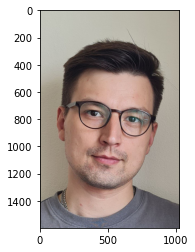

In [20]:
plt.imshow(res_image)

In [21]:
def predict_actor(path, model, dict_labels):
    face = face_recognition.load_image_file(path)
    face_bounding_boxes = face_recognition.face_locations(face)
    
    if len(face_bounding_boxes) != 1:
        print('Problem with find face')
    else:
        # Convert photo with face to vector, get embedding 
        face_enc = face_recognition.face_encodings(face)[0]
        
        # Predict actress/actor
        predict = clf.predict([face_enc])
        predict_labels = list(dict_labels.keys())[list(dict_labels.values()).index(predict)]
        
        preict_proba = clf.predict_proba([face_enc])
        
        return predict_labels, preict_proba

In [28]:
predict_name, preict_proba = predict_actor('2.jpg', clf, dict_labels)
predict_name

'James McAvoy'

In [30]:
dict_labels.keys()

dict_keys(['Adam Sandler', 'Adrien Brody', 'Al Pacino', 'Anthony Hopkins', 'Antonio Banderas', 'Arnold Schwarzenegger', 'Ashton Kutcher', 'Ben Stiller', 'Ben Foster', 'Ben Affleck', 'Brad Pitt', 'Bruce Willis', 'Charlie Sheen', 'Christian Bale', 'Christoph Waltz', 'Clint Eastwood', 'Colin Firth', 'Cuba Gooding Jr.', 'Daniel Day-Lewis', 'Dennis Quaid', 'Denzel Washington', 'Donald Sutherland', 'Dustin Hoffman', 'Edward Norton', 'Gary Oldman', 'George Clooney', 'Gerard Butler', 'Harrison Ford', 'Hugh Grant', 'Hugh Jackman', 'Ian Holm', 'Jack Black', 'Jack Nicholson', 'Jake Gyllenhaal', 'James McAvoy', 'Jamie Foxx', 'Jeff Goldblum', 'Jeff Bridges', 'Jeremy Renner', 'Jim Carrey', 'John Travolta', 'John Malkovich', 'Johnny Depp', 'Jude Law', 'Keanu Reeves', 'Kevin Spacey', 'Leonardo DiCaprio', 'Liam Neeson', 'Martin Sheen', 'Matt Damon', 'Matthew McConaughey', 'Mel Gibson', 'Michael Douglas', 'Morgan Freeman', 'Nicolas Cage', 'Orlando Bloom', 'Owen Wilson', 'Philip Seymour Hoffman', 'Robert

In [31]:
# table with scoring
df = pd.DataFrame()

df['act'] = list(dict_labels.keys())
df['score'] = preict_proba[0]

In [32]:
df.sort_values(by='score')[::-1]

,act,score
34,James McAvoy,0.028307
9,Ben Affleck,0.021872
42,Johnny Depp,0.021334
49,Matt Damon,0.020879
46,Leonardo DiCaprio,0.020412
...,...,...
4,Antonio Banderas,0.008942
30,Ian Holm,0.008765
25,George Clooney,0.008761
22,Dustin Hoffman,0.008739


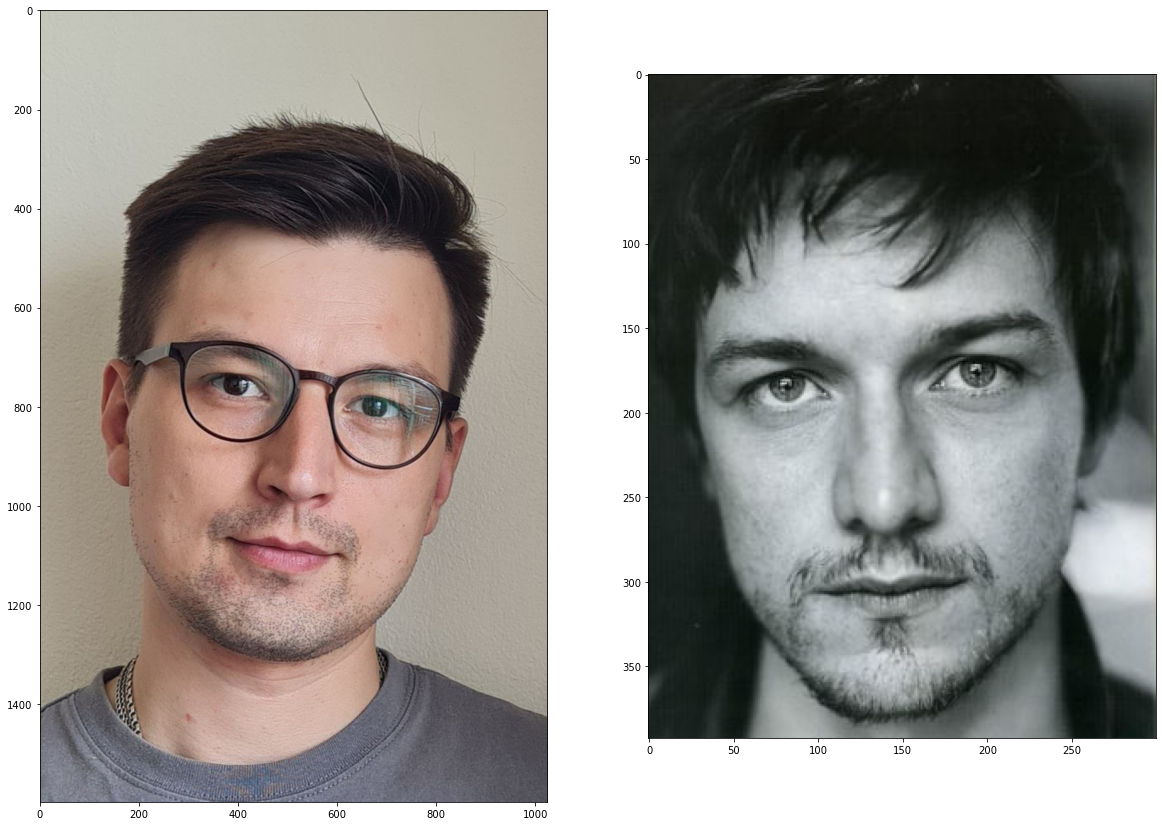

In [48]:
num_image = 3

image1 = face_recognition.load_image_file("2.jpg")
image2 = face_recognition.load_image_file(f"dataset/men/{predict_name}/Image_{num_image}.jpg")

fig, ax = plt.subplots(1, 2, figsize=(20,20))

ax[0].imshow(image1)
ax[1].imshow(image2);

# Obtaining an average cosine score

In [49]:
def comparison(path_test, name_act, num_image):
    # test image
    face_1 = face_recognition.load_image_file(path_test)
    face_enc_1 = face_recognition.face_encodings(face_1)[0]
    
    # actor
    path_act = f"dataset/men/{name_act}/Image_{num_image}.jpg"
    
    face_2 = face_recognition.load_image_file(path_act)
    face_enc_2 = face_recognition.face_encodings(face_2)[0]
    
    return cosine_similarity(face_enc_1.reshape(1, -1), face_enc_2.reshape(1, -1))[0]

In [50]:
len_files = len(glob.glob(f'dataset/men/{predict_name}/*'))
cos = []

for i in tqdm_notebook(range(len_files)):
    try:
        cos_ = comparison('2.jpg', predict_name, i)
        cos.append(cos_)
        print(i, cos_)
    except Exception as ex:
        print(f'message: {ex}')
        
print(f'Mean score = {np.mean(cos)}')

/tmp/ipykernel_22080/1840623658.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len_files)):


  0%|          | 0/15 [00:00<?, ?it/s]

message: [Errno 2] No such file or directory: 'dataset/men/James McAvoy/Image_0.jpg'
1 [0.88232689]
2 [0.90871497]
3 [0.90784894]
4 [0.81763574]
5 [0.91022319]
6 [0.83879795]
7 [0.87983004]
8 [0.91111778]
9 [0.903884]
10 [0.90428909]
11 [0.85497829]
message: list index out of range
13 [0.89951169]
14 [0.8947366]
Mean score = 0.8856842433881668


In [51]:
predict_name = 'James McAvoy'

len_files = len(glob.glob(f'dataset/men/{predict_name}/*'))
cos = []

for i in tqdm_notebook(range(len_files)):
    try:
        cos_ = comparison('2.jpg', predict_name, i)
        cos.append(cos_)
        print(i, cos_)
    except Exception as ex:
        print(f'message: {ex}')
        
print(f'Mean score = {np.mean(cos)}')

/tmp/ipykernel_22080/3549838675.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len_files)):


  0%|          | 0/15 [00:00<?, ?it/s]

message: [Errno 2] No such file or directory: 'dataset/men/James McAvoy/Image_0.jpg'
1 [0.88232689]
2 [0.90871497]
3 [0.90784894]
4 [0.81763574]
5 [0.91022319]
6 [0.83879795]
7 [0.87983004]
8 [0.91111778]
9 [0.903884]
10 [0.90428909]
11 [0.85497829]
message: list index out of range
13 [0.89951169]
14 [0.8947366]
Mean score = 0.8856842433881668
